
Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

module3-permutation-boosting/LS_DS_233_assignment.ipynbmodule3-permutation-boosting/LS_DS_233_assignment.ipynbmodule3-permutation-boosting/LS_DS_233_assignment.ipynbmodule3-permutation-boosting/LS_DS_233_assignment.ipynbmodule3-permutation-boosting/LS_DS_233_assignment.ipynbmodule3-permutation-boosting/LS_DS_233_assignment.ipynbmodule3-permutation-boosting/LS_DS_233_assignment.ipynbmodule3-permutation-boosting/LS_DS_233_assignment.ipynbmodule3-permutation-boosting/LS_DS_233_assignment.ipynbmodule3-permutation-boosting/LS_DS_233_assignment.ipynb## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
census = pd.read_csv('https://raw.githubusercontent.com/VPDeb/DS-Unit-2-Applied-Modeling/master/Build%20Week%20Project/census.csv')

In [4]:
census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
#cenusus2 = pd.read_csv('https://raw.githubusercontent.com/VPDeb/DS-Unit-2-Applied-Modeling/master/Build%20Week%20Project/census.csv')

In [6]:
#census2

In [7]:
census.isin(['?']).sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [8]:
census.replace({'?': np.NaN}, inplace=True)

In [9]:
census.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [10]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [11]:
census.astype(object).nunique()

age                  74
workclass             8
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       41
income                2
dtype: int64

In [12]:
census.replace({'?': 'NaN'}, inplace=True)

In [13]:
census.dropna(inplace=True)

In [14]:
census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [15]:
def over50K(census):
    if census['income'] == '>50K':
        val = 1
    else:
        val = 0
    return val
census['makes-50K+'] = census.apply(over50K, axis=1)
  
    
    #X.fillna(census.mean())


In [16]:
def over40(census):
    if census['hours-per-week'] >=40:
        val = 1
    else:
        val = 0
    return val
census['over40hrs+'] = census.apply(over40, axis=1)

In [17]:
def gender(census):
    if census['sex'] == 'Female':
            val = 1
    else:
            val = 0
    return val
census['gender-F/1-M/0'] = census.apply(gender, axis=1)

In [18]:
census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,makes-50K+,over40hrs+,gender-F/1-M/0
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,1,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,1,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,1,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,0,1
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,1,0
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,1,1
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,0,0


In [19]:
#cols = 'fnlwgt','income','hours-per-week','sex'
census = census.drop(columns=['fnlwgt','income','hours-per-week','sex'])

In [20]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   capital-gain    45222 non-null  int64 
 9   capital-loss    45222 non-null  int64 
 10  native-country  45222 non-null  object
 11  makes-50K+      45222 non-null  int64 
 12  over40hrs+      45222 non-null  int64 
 13  gender-F/1-M/0  45222 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 5.2+ MB


In [21]:
census

,age,workclass,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,native-country,makes-50K+,over40hrs+,gender-F/1-M/0
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,United-States,0,1,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,United-States,0,1,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,United-States,1,1,0
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,United-States,1,1,0
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,0,0,United-States,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,United-States,0,0,1
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,United-States,1,1,0
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,United-States,0,1,1
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,United-States,0,0,0


In [22]:
target = 'gender-F/1-M/0'
y = census[target]
X = census.drop(target,axis=1)

In [23]:
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,native-country,makes-50K+,over40hrs+
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,United-States,0,1
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,United-States,0,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,United-States,1,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,United-States,1,1
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,0,0,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,United-States,0,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,United-States,1,1
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,United-States,0,1
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,United-States,0,0


In [24]:
y

0        0
1        0
2        0
3        0
5        0
        ..
48837    1
48838    0
48839    1
48840    0
48841    1
Name: gender-F/1-M/0, Length: 45222, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
y_train.value_counts()

0    24405
1    11772
Name: gender-F/1-M/0, dtype: int64

In [27]:
print('Baseline Accuracy:', y_train.value_counts(normalize=True).max())

Baseline Accuracy: 0.6745998839041379


In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt

In [29]:
model_bag = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier()
)
model_bag.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['workclass', 'education',
                                      'marital-status', 'occupation',
                                      'relationship', 'race',
                                      'native-country'],
                                mapping=[{'col': 'workclass',
                                          'data_type': dtype('O'),
                                          'mapping': Self-emp-inc        1
Private             2
Self-emp-not-inc    3
State-gov           4
Local-gov           5
Federal-gov         6
Without-pay         7
NaN                -2
dtype: int64},
                                         {'col': 'education',
                                          'data_type': dtype('O'...
Columbia                      16
China                         17
Iran                          18
El-Salvador                   19
Greece                        20
Ecuador                       21
Italy      

In [30]:
model_boost = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier()
)
model_boost.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['workclass', 'education',
                                      'marital-status', 'occupation',
                                      'relationship', 'race',
                                      'native-country'],
                                mapping=[{'col': 'workclass',
                                          'data_type': dtype('O'),
                                          'mapping': Self-emp-inc        1
Private             2
Self-emp-not-inc    3
State-gov           4
Local-gov           5
Federal-gov         6
Without-pay         7
NaN                -2
dtype: int64},
                                         {'col': 'education',
                                          'data_type': dtype('O'...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                        

In [31]:
print('Training accuracy:', model_bag.score(X_train, y_train))
print('Validation accuracy:', model_bag.score(X_test, y_test))

Training accuracy: 0.9592005970644332
Validation accuracy: 0.8341625207296849


In [32]:
print('Training accuracy:', model_boost.score(X_train, y_train))
print('Validation accuracy:', model_boost.score(X_test, y_test))

Training accuracy: 0.8896812892169058
Validation accuracy: 0.8514096185737977


In [33]:
perm_imp = permutation_importance(model_boost, X_test, y_test, n_jobs=10, random_state=42)

data = {'importances_mean' : perm_imp['importances_mean'],
        'importances_std' : perm_imp['importances_std']}

permutation_importances = pd.DataFrame(data, index=X_test.columns)
permutation_importances.sort_values('importances_mean', ascending=True, inplace=True)
permutation_importances

,importances_mean,importances_std
capital-loss,2.220446e-17,0.000280
education,7.517966e-04,0.001059
race,1.238253e-03,0.001284
native-country,2.034273e-03,0.000814
capital-gain,2.343836e-03,0.000486
education-num,2.476506e-03,0.001024
workclass,5.704809e-03,0.001337
over40hrs+,5.925926e-03,0.001275
age,6.279713e-03,0.002800
makes-50K+,7.562189e-03,0.001792


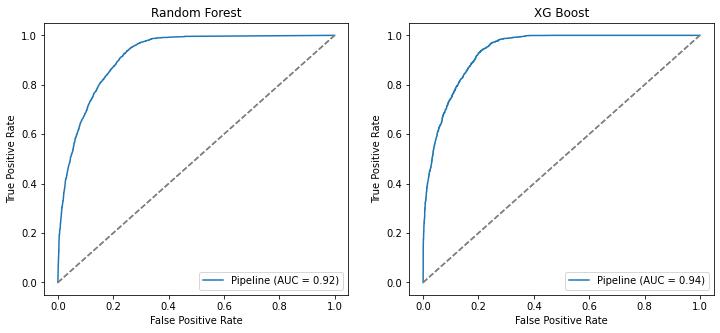

In [34]:

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

plot_roc_curve(model_bag, X_test, y_test, ax=ax1)
plot_roc_curve(model_boost, X_test, y_test, ax=ax2)
ax1.plot([(0,0), (1,1)], color='grey', linestyle='--')
ax2.plot([(0,0), (1,1)], color='grey', linestyle='--')
ax1.set_title('Random Forest')
ax2.set_title('XG Boost')

plt.show()

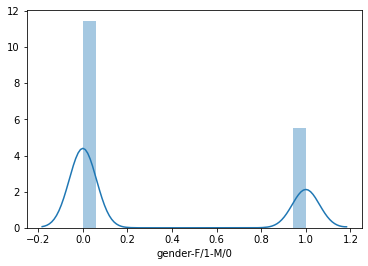

In [35]:
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

In [1]:
#!brew install gcc
!pip install pdpbox
!pip install shap

  Using cached psutil-5.7.2.tar.gz (460 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/victoriadebebe/.local/share/virtualenvs/DS-Unit-2-Applied-Modeling-vWvUDltt/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/6m/4k1n61yd52v05hvbzzn0ncv80000gn/T/pip-install-wgxfqo6v/psutil/setup.py'"'"'; __file__='"'"'/private/var/folders/6m/4k1n61yd52v05hvbzzn0ncv80000gn/T/pip-install-wgxfqo6v/psutil/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/6m/4k1n61yd52v05hvbzzn0ncv80000gn/T/pip-wheel-jbw78mcu
       cwd: /private/var/folders/6m/4k1n61yd52v05hvbzzn0ncv80000gn/T/pip-install-wgxfqo6v/psutil/
  Complete output (143 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.14.6-x86_64-3.8
  creating build/lib.macos

In [36]:
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], 
    index=features[1]
)[::-1] 

NameError: name 'interaction' is not defined

In [ ]:
import plotly.graph_objs as go

surface = go.Surface(
    x=pdp.columns, 
    y=pdp.index, 
    z=pdp.values
)


layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title=target)
    )
)

fig = go.Figure(surface, layout)
fig.show()

In [ ]:
import category_encoders as ce
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

df = sns.load_dataset('titanic')
df.age = df.age.fillna(df.age.median())
df = df.drop(columns='deck')
df = df.dropna()

target = 'survived'
features = df.columns.drop(['survived', 'alive'])

X = df[features]
y = df[target]

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'sex'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [ ]:
encoder.mapping

In [ ]:
pdp.pdp_plot(pdp_dist, feature)

# Manually change the xticks labels
plt.xticks([1, 2], ['male', 'female']);

In [ ]:
feature = 'sex'
for item in encoder.mapping:
    if item['col'] == feature:
        feature_mapping = item['mapping']
        
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()

In [ ]:
pdp.pdp_plot(pdp_dist, feature)

# Automatically change the xticks labels
plt.xticks(category_codes, category_names);

In [ ]:
features = ['sex', 'age']

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [ ]:
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], # First feature on x axis
    index=features[1]    # Next feature on y axis
)[::-1]  # Reverse the index order so y axis is ascending

pdp = pdp.rename(columns=dict(zip(category_codes, category_names)))
plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
plt.title('Partial Dependence of Titanic survival, on sex & age');

# Shapely Plots

In [ ]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

# Do train/test split
# Use data from April & May 2016 to train
# Use data from June 2016 to test
df['created'] = pd.to_datetime(df['created'], infer_datetime_format=True)
cutoff = pd.to_datetime('2016-06-01')
train = df[df.created < cutoff]
test  = df[df.created >= cutoff]

In [ ]:
features = ['bedrooms', 'bathrooms', 'longitude', 'latitude']
target = 'price'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [ ]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_